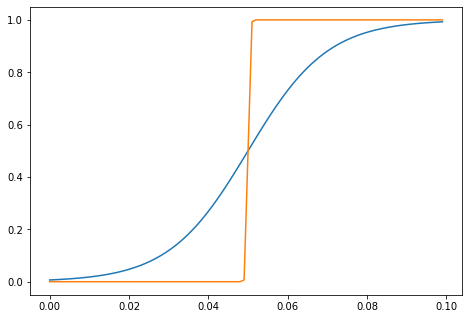

In [ ]:
import math
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt

def r(yfl, m, theta):
    denom = 1 + math.exp(m*(theta - yfl))
    return 1/denom


m = 100
theta = 0.05


%matplotlib inline
yfl = np.arange(0, 0.1, 0.001)
r_yfl = []
for i in yfl:
    r_yfl.append(r(i, m, theta))

ax = plt.figure()
ax = ax.add_axes([0,0,1,1])
ax.plot(yfl, r_yfl)

m1 = 5000
r_yfl1 = []
for i in yfl:
    r_yfl1.append(r(i, m1, theta))
    

ax.plot(yfl, r_yfl1)    

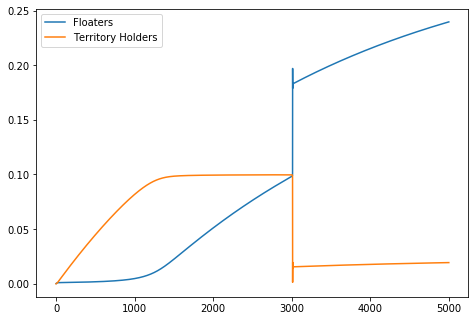

In [ ]:
def aayu(v, dth, dfl, m, theta, yth = 0, yfl = 0):
    x_rapid = 0.1 - yth
    x_pool = 0.9 - yfl
    yfl_list = []
    yth_list = []
    for t in range(5000):
        temp1 = yth
        temp2 = yfl
        yth = temp1 + temp2*x_rapid - dth*temp1 - r(temp2, m, theta)*temp1
        yfl = temp2 + v + r(temp2, m, theta)*temp1 - dfl*temp2 - temp2*x_rapid
 

        yfl_list.append(yfl)
        yth_list.append(yth)
        
        x_rapid -= (yth - temp1)
        x_pool -= (yfl - temp2)
    return yth_list, yfl_list   


%matplotlib inline    


y_fl = aayu(0.0001, 0.0003, 0.0003, 5000, 0.1)[1]
y_th = aayu(0.0001, 0.0003, 0.0003, 5000, 0.1)[0]
y = [sum(i) for i in zip(y_th, y_fl)] 

y_th1 = aayu(0.0001, 0.0003, 0.0003, 200, 0.1)[0]

tstamps = np.arange(5000)
ax1 = plt.figure()
ax1 = ax1.add_axes([0,0,1,1])

ax1.plot(tstamps, y_fl, label = 'Floaters')
ax1.plot(tstamps, y_th, label = 'Territory Holders')       
ax1.legend()

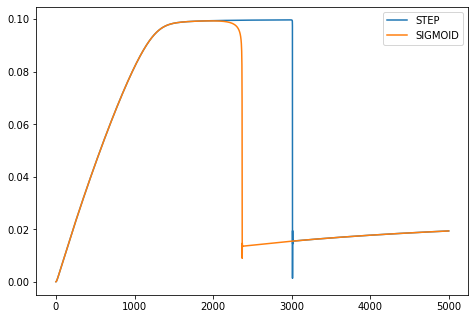

In [ ]:
ax2 = plt.figure()
ax2 = ax2.add_axes([0,0,1,1])
ax2.plot(tstamps, y_th, label = 'STEP')
ax2.plot(tstamps, y_th1, label = 'SIGMOID')       
ax2.legend()

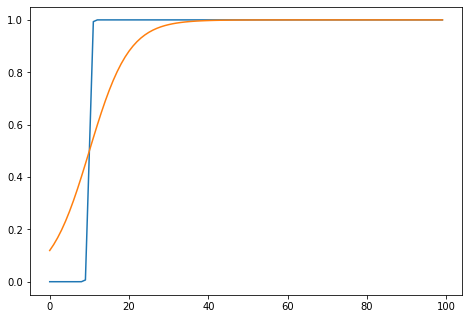

In [ ]:
ax3 = plt.figure()
ax3 = ax3.add_axes([0,0,1,1])
r_yfl1 = []
for i in yfl:
    r_yfl1.append(r(i, 5000, 0.01))
ax3.plot(np.arange(len(r_yfl1)), r_yfl1)

r_yfl2 = []
for i in yfl:
    r_yfl2.append(r(i, 200, 0.01))
ax3.plot(np.arange(len(r_yfl2)), r_yfl2)

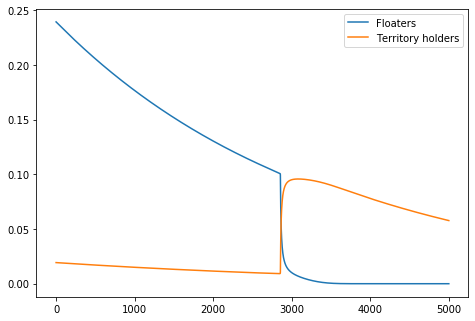

In [ ]:

ax4 = plt.figure()
ax4 = ax4.add_axes([0, 0, 1, 1])

yfl_init = aayu(0.0001, 0.0003, 0.0003, 5000, 0.1)[1][-1]
yth_init = aayu(0.0001, 0.0003, 0.0003, 5000, 0.1)[0][-1]

y_fl_dec = aayu(0, 0.0003, 0.0003, 5000, 0.1, yth_init, yfl_init)[1]
y_th_dec = aayu(0, 0.0003, 0.0003, 5000, 0.1, yth_init, yfl_init)[0]

tstamps = np.arange(len(y_fl_dec))
ax4.plot(tstamps, y_fl_dec, label = 'Floaters')
ax4.plot(tstamps, y_th_dec, label = 'Territory holders')
ax4.legend()

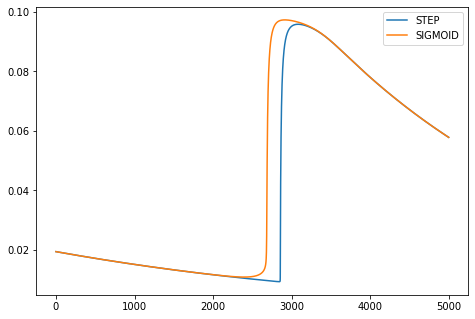

In [ ]:
ax5 = plt.figure()
ax5 = ax5.add_axes([0,0,1,1])
yth_dec = aayu(0, 0.0003, 0.0003, 5000, 0.1, yth_init, yfl_init)[0]
yth_dec1 = aayu(0, 0.0003, 0.0003, 200, 0.1, yth_init, yfl_init)[0]

ax5.plot(tstamps, yth_dec, label = 'STEP')
ax5.plot(tstamps, yth_dec1, label = 'SIGMOID')       
ax5.legend()